In [9]:
#%matplotlib widget
import dynpssimpy.dynamic as dps
import dynpssimpy.modal_analysis as dps_mdl
import dynpssimpy.plotting as dps_plt
import dynpssimpy.ps_models.k2a as model_data
import numpy as np
import matplotlib.pyplot as plt

# Load data into model
ps = dps.PowerSystemModel(model_data.load())
ps.power_flow()
ps.init_dyn_sim()

Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN


In [6]:
# Perform system linearization
ps_lin = dps_mdl.PowerSystemModelLinearization(ps)
ps_lin.linearize()
ps_lin.eigenvalue_decomposition()

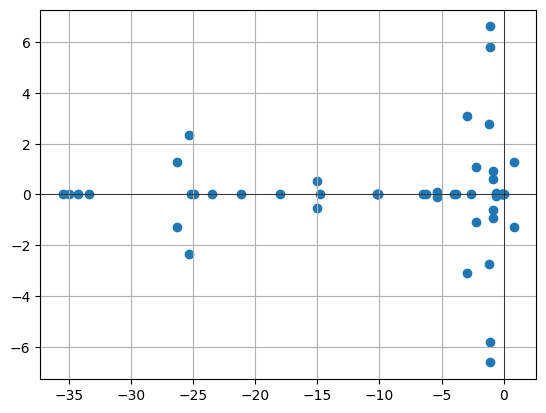

In [7]:
# Plot eigenvalues
dps_plt.plot_eigs(ps_lin.eigs)

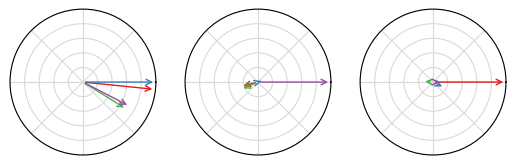

In [8]:
# Get mode shape for electromechanical modes
mode_idx = ps_lin.get_mode_idx(['em', 'non_conj'], damp_threshold=0.3)
rev = ps_lin.rev
mode_shape = rev[np.ix_(ps.gen['GEN'].state_idx_global['speed'], mode_idx)]

# Plot mode shape
fig, ax = plt.subplots(1, mode_shape.shape[1], subplot_kw={'projection': 'polar'})
for ax_, ms in zip(ax, mode_shape.T):
    dps_plt.plot_mode_shape(ms, ax=ax_, normalize=True)
plt.show()